<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Linear Regression 1D: Training One Parameter</h1>


<h2>Objective</h2><ul><li> How to create cost or criterion function using MSE (Mean Square Error).</li></ul> 


<h2>Preparation</h2>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

The class <code>plot_diagram</code> helps us to visualize the data space and the parameter space during training and has nothing to do with PyTorch.


In [2]:
# The class for plotting

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()
       
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space // Estimated Line // Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
  
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<h2 id="Makeup_Data">Make Some Data</h2>


In [3]:
import torch

Generate values from -3 to 3 that create a line with a slope of -3. This is the line you will estimate.


In [4]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

y = f + 0.1 * torch.randn(X.size()) # Add some GAUSSIAN noise to f(X) and save it in Y

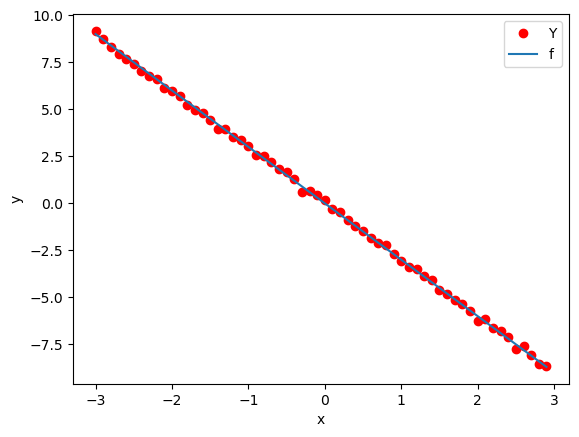

In [5]:
# Plot the data points

plt.plot(X.numpy(), y.numpy(), 'ro', label = 'Y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Model_Cost">Create the Model and Cost Function (Total Loss)</h2>


First, define the <code>forward</code> function $y=w*x$. (We will add the bias in the next lab.)


In [6]:
def forward(x):
    return w * x

In [7]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Define the learning rate <code>lr</code> and an empty list <code>Loss</code> to record the loss for each iteration:   


In [8]:
lr = 0.1
Loss = []

Create model parameter by setting the argument <code>requires_grad</code> to <code>True</code> because the system must learn it.


In [9]:
w = torch.tensor(-10.0, requires_grad = True)

Create a <code>plot_diagram</code> object to visualize the data space and the parameter space for each iteration during training:


In [10]:
gradient_plot = plot_diagram(X, y, w, stop = 5)

<class 'numpy.ndarray'>


<h2 id="Train">Train the Model</h2>


In [11]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction
        yhat = forward(X)
        
        # define cost function
        loss = criterion(yhat, y)
        
        # plot the diagram to have better idea
        gradient_plot(yhat, w, loss.item(), epoch)
        
        # store the loss into list
        Loss.append(loss.item())
        
        # backward pass: compute gradient of the loss wrt all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before next iteration
        w.grad.data.zero_()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


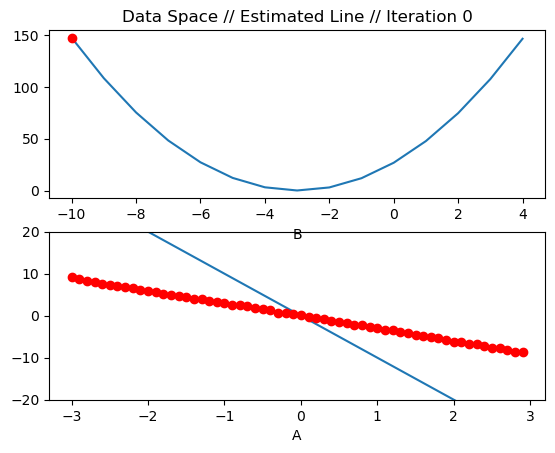

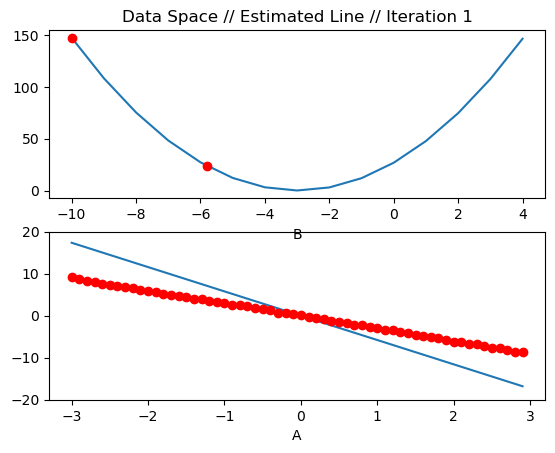

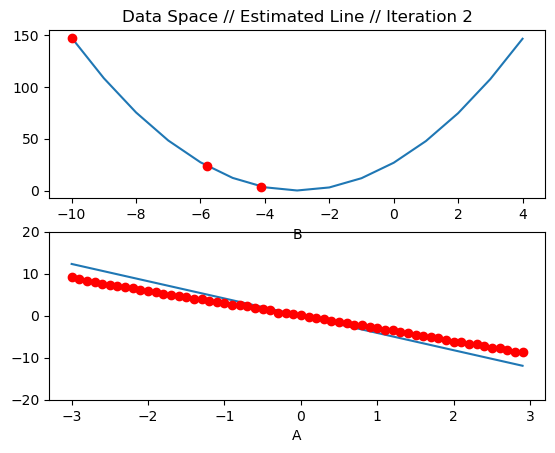

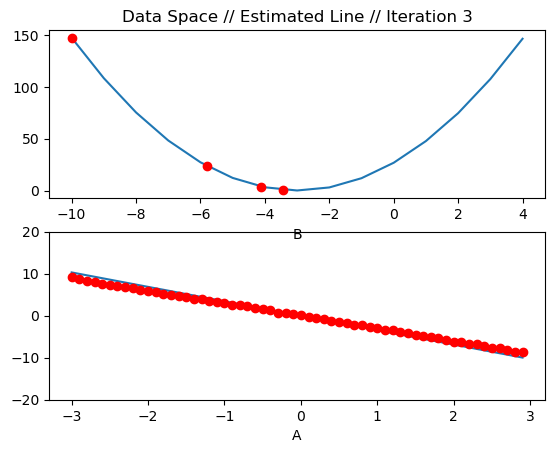

<Figure size 640x480 with 0 Axes>

In [12]:
# Give 4 iterations for training the model

train_model(4)

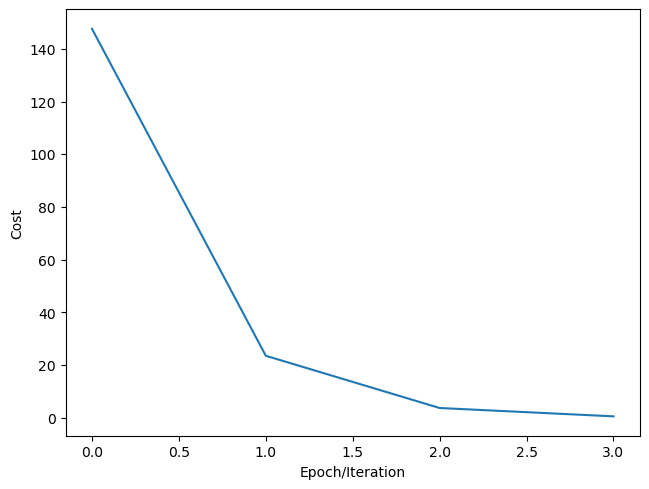

In [13]:
# Plot the loss for each iteration

plt.plot(Loss)
plt.tight_layout()
plt.xlabel("Epoch/Iteration")
plt.ylabel("Cost")
plt.show()